In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [79]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


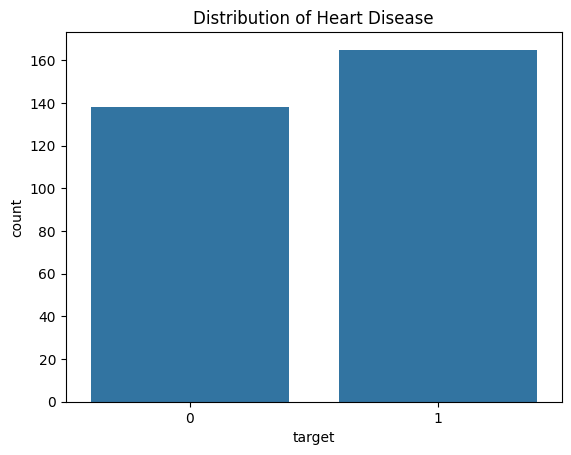

In [80]:
# Check for missing values
print(data.isnull().sum())

# Visualize the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

# Pairplot to visualize the relationships
#sns.pairplot(data, hue='target')
#plt.show()


In [81]:
# Prepare features and target variable
X = data.drop('target', axis=1)
y = data['target']


In [101]:
# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
# K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []  # To store accuracy for each fold

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}/{k}")

    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the ANN model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Create early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on validation data
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(val_accuracy)
    print(f"Validation Accuracy for Fold {fold + 1}: {val_accuracy:.4f}")


Fold 1/5
Validation Accuracy for Fold 1: 0.8525
Fold 2/5
Validation Accuracy for Fold 2: 0.7049
Fold 3/5
Validation Accuracy for Fold 3: 0.8361
Fold 4/5
Validation Accuracy for Fold 4: 0.7500
Fold 5/5
Validation Accuracy for Fold 5: 0.8667


In [104]:

# Print average accuracy across all folds
print(f"\nAverage Validation Accuracy across {k} folds: {np.mean(accuracies):.4f}")

# If desired, you can also evaluate the confusion matrix and classification report
# for the last fold (or any specific fold) using the predictions
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Average Validation Accuracy across 5 folds: 0.8020
2/2 [==============================] - 0s 3ms/step
Confusion Matrix:
[[25  4]
 [ 4 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.87      0.87      0.87        31

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [105]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_val, y_pred))


2/2 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.87      0.87      0.87        31

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [96]:
# Train the model with early stopping and learning rate scheduling
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
22/22 [==============================] - 2s 10ms/step - loss: 0.6838 - accuracy: 0.5853 - val_loss: 0.6624 - val_accuracy: 0.5600
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.7373 - val_loss: 0.5763 - val_accuracy: 0.8000
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.7926 - val_loss: 0.5206 - val_accuracy: 0.8000
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.8295 - val_loss: 0.4755 - val_accuracy: 0.8400
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8341 - val_loss: 0.4376 - val_accuracy: 0.8400
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8433 - val_loss: 0.4224 - val_accuracy: 0.8400
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8664 - val_loss: 0.3980 - val_accuracy: 0.8400
Epoch 8/100


In [108]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 [==============================] - 0s 5ms/step - loss: 0.3454 - accuracy: 0.8852
Test Accuracy: 88.52%


2/2 [==============================] - 0s 3ms/step


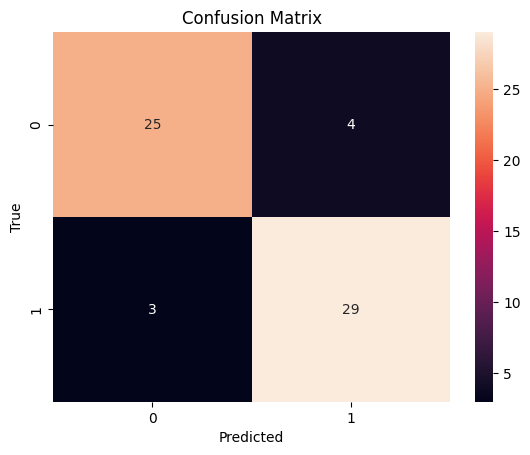

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [109]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


2/2 [==============================] - 0s 3ms/step


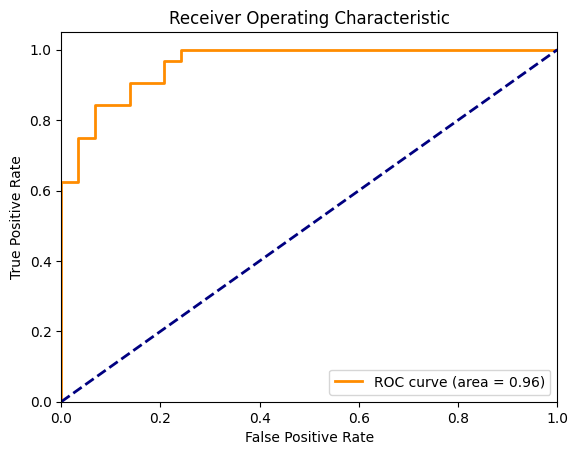

In [110]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [111]:
# Save the trained model
model.save('heart_attack_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
